# World Color Survey (WCS) Analysis: Demo & Starter Code

Spring 2017, COGSCI 88: Data Science and the Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

  *Courtesy of Joshua Abbott, Vasilis Oikonomou, Jessie Salas, and Janaki Vivrekar; $\alpha$-tested by Janaki Vivrekar and Yang Xu*  
  
  Copyright @ 2017, UC Berkeley


In [1]:
# Import helper function file for WCS data analysis
from wcs_helper_functions import *

# Import relevant Python libraries
import numpy as np
from scipy import stats
from random import random
%matplotlib inline

## Demo 1: Import stimulus (color chip) information in [Munsell space](https://en.wikipedia.org/wiki/Munsell_color_system)

> Stimuli were 330 color chips in Munsell space, each defined along lightness and hue dimensions

> Each color chip has an index (from 1 to 330) and a coordinate (lightness *(alphabet)*, hue *(integer)*)

In the following demo, we see how to convert from (a) index to coordinate and (b) coordinate to index.

In [2]:
# Load chip information in Munsell space
# `munsellInfo` is a 2-element tuple with dictionary elements
munsellInfo = readChipData('./WCS_data_core/chip.txt');

### (a) Index `-->` Coordinate

In [3]:
# Access the second dictionary in `munsellInfo`
indexCoord = munsellInfo[1]

# `indexCoord` is a dictionary with index (key) --> coordinate (value) pairs
# For example, to retrieve the Munsell coordinate (lightness, hue) for chip with numerical index 1:
print(indexCoord[1])

# You can also uncomment the following to display full stimulus information (long)
# print(indexCoord)

('E', '29')


### (b) Coordinate `-->` Index

In [4]:
# Access the first dictionary in `munsellInfo`
coordIndex = munsellInfo[0]

# `coordIndex` is a dictionary with coordinate (key) --> index (value) pairs
# For example, to access numerical index for color chip at Munsell coordinate (D, 11):
print(coordIndex['D11'])

# You can also uncomment the following to display full stimulus information (long)
#print(coordIndex)

258


## Demo 2: Import stimulus information in [CIELAB space](https://en.wikipedia.org/wiki/Lab_color_space)

> Each of the 330 stimuli can also be mapped to the 3D CIELAB space, where the dimensions are `l` (lightness), `a`, & `b` (color opponency)

> CIELAB Coordinates have a one-to-one correspondence with Munsell index, which ranges from 1 to 330.

In [5]:
# Load chip coordinates in CIELAB
# `cielabCoord` is a dictionary with index (key) --> CIELAB Coordinate (value) pairs
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

# For example, to obtain the CEILAB coordinates for chip with numerical index 1:
print(cielabCoord[1])

('61.70', '-4.52', '-39.18')


## Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages.

In [6]:
# Load naming data
# `namingData` is a hierarchical dictionary organized as follows:
# language (1 - 110) --> speaker (1 - *range varies per language*) --> chip index (1 - 330)--> color term
namingData = readNamingData('./WCS_data_core/term.txt')

# For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:
namingData[1][1]; # remove semicolon to see data in full

In [7]:
# For example, to see how many speakers language 1 has:
len(namingData[1])

25

## Demo 4: Import color foci data
    
> Apart from naming the color chips, each speaker also pointed to foci color chips for each color term they had used

> Note: A single color term may have multiple foci locations

In [8]:
# Load foci data
# `fociData` is a hierarchical dictionary organized as follows:
# language (1 - 110) --> speaker (1 - *range varies per language*) --> color term --> foci coordinates
fociData = readFociData('./WCS_data_core/foci-exp.txt');

# For example, to obtain foci data for language 1 and speaker 1, where each entry shows foci locations for given term:
# e.g. foci for term 'LF' is located at coordinate (A, 0) in the Munsell chart
fociData[1][1]

{'F': ['D:25'],
 'G': ['F:17'],
 'LB': ['J:0'],
 'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3'],
 'LF': ['A:0'],
 'WK': ['D:9', 'D:10', 'D:11', 'D:12']}

## Demo 5: Import speaker demographic information

> Most speakers' age (integer) and gender (M/F) information was recorded

In [9]:
# Load speaker information
# `speakerInfo` is a hierarchical dictionary organized by language->speaker(key)-(age,gender)(value)
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

# For example, uncomment the following line to access (age, gender) information for all speakers from language 1:
#speakerInfo[1]

# For example, uncomment the following line ot access (age, gender) information for speaker 1 from language 1:
#speakerInfo[1][1]

## Demo 6: Visualize color naming from an individual speaker

> Naming patterns from a speaker can be visualized in the stimulus palette (Munsell space)

In [10]:
# Extract an example speaker datum from an example language 
lg61_spk5 = namingData[61][5]

In [11]:
# Extract color terms used by that speaker
terms = lg61_spk5.values()

# Encode the color terms into random numbers (for plotting purposes)
encoded_terms = map_array_to(terms, generate_random_values(terms))

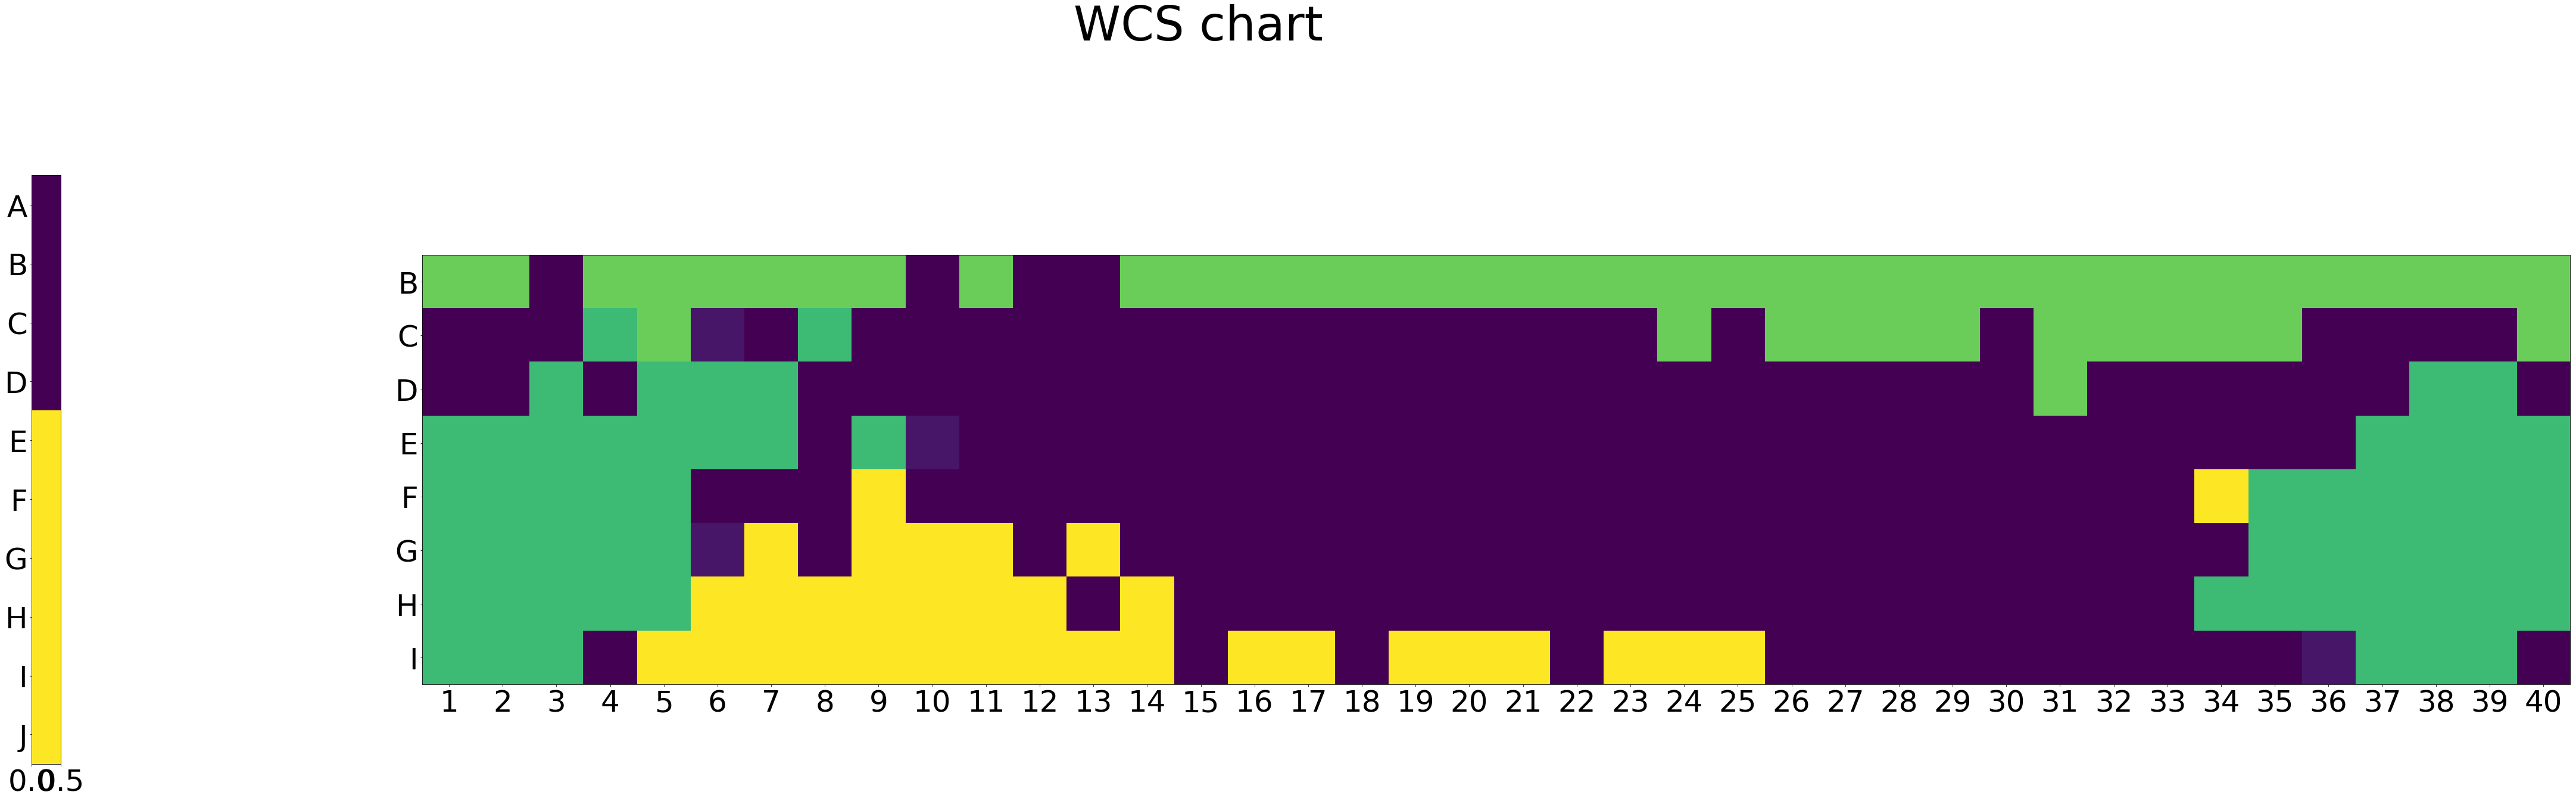

In [12]:
# Visualize the color naming pattern for that speaker: Each color patch corresponds to extension of a color term
# Color scheme is randomized, but the partition of the color space is invariant
plotValues(encoded_terms)

# Note: "plotValues()" is a generic function for visualizing various kinds of information on the chart, suited to needs

Now you are in a position to start exploring this data set - enjoy!